# Pre-Challenge

The codes provided in the slide serve as preparation for the challenge.

In [39]:
# Import libraries
import scipy
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

In [10]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

In [11]:
# Dataset shape
print(dataset.shape)

(150, 5)


In [12]:
# Dataset head
print(dataset.head(10))

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [13]:
# Dataset descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [14]:
# Dataset class distributions
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [16]:
# Get columns from iris dataset
array = dataset.values
print(array[:5])
print()

X = array[:,0:4]
print(X[:5])
print()

Y = array[:,4]
print(Y[:5])

[[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']]

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]]

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [17]:
# Split data: Train and validation datasets
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)

In [19]:
print(len(Y_train)) # Data train
print(len(Y_validation)) # Data test
print(len(Y_validation) / (len(Y_train) + len(Y_validation))) # test_size percentage

120
30
0.2


In [20]:
# Spot check algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Challenge 1

Make table to summarise results using LR, LDA, KNN, CART, NB, and SVM while determining Iris-setosa, Iris-versicolor, and Iris-virginica.

In [35]:
# Prediction for individual methods

for name, model in models:
    # Make predictions on validation dataset
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)

    # Evaluate predictions
    print("="*26 + name + "="*26)
    print("\naccuracy: " + str(accuracy_score(Y_validation, predictions)))
    print("\nconfussion matrix:")
    print(confusion_matrix(Y_validation, predictions))
    print("\nreport:")
    print(classification_report(Y_validation, predictions))
    print()

==========================LR==========================

accuracy: 0.8333333333333334

confussion matrix:
[[11  0  0]
 [ 0  8  5]
 [ 0  0  6]]

report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.62      0.76        13
 Iris-virginica       0.55      1.00      0.71         6

       accuracy                           0.83        30
      macro avg       0.85      0.87      0.82        30
   weighted avg       0.91      0.83      0.84        30


==========================LDA==========================

accuracy: 1.0

confussion matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [84]:
# Summarising table for all methods
results = []

for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)

    # Accuracy
    accuracy = accuracy_score(Y_validation, predictions)

    # Macro average scores
    macro_precision = precision_score(Y_validation, predictions, average='macro')
    macro_recall = recall_score(Y_validation, predictions, average='macro')
    macro_f1 = f1_score(Y_validation, predictions, average='macro')

    # Per-class scores from classification report
    report = classification_report(Y_validation, predictions, output_dict=True)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision (Macro)': macro_precision,
        'Recall (Macro)': macro_recall,
        'F1-Score (Macro)': macro_f1,
        'Iris-setosa_Precision': report['Iris-setosa']['precision'],
        'Iris-setosa_Recall': report['Iris-setosa']['recall'],
        'Iris-setosa_F1': report['Iris-setosa']['f1-score'],
        'Iris-versicolor_Precision': report['Iris-versicolor']['precision'],
        'Iris-versicolor_Recall': report['Iris-versicolor']['recall'],
        'Iris-versicolor_F1': report['Iris-versicolor']['f1-score'],
        'Iris-virginica_Precision': report['Iris-virginica']['precision'],
        'Iris-virginica_Recall': report['Iris-virginica']['recall'],
        'Iris-virginica_F1': report['Iris-virginica']['f1-score'],
    })

results_df = pd.DataFrame(results)
results_df.round(3)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,Model,Accuracy,Precision (Macro),Recall (Macro),F1-Score (Macro),Iris-setosa_Precision,Iris-setosa_Recall,Iris-setosa_F1,Iris-versicolor_Precision,Iris-versicolor_Recall,Iris-versicolor_F1,Iris-virginica_Precision,Iris-virginica_Recall,Iris-virginica_F1
0,LR,0.833,0.848,0.872,0.823,1.0,1.0,1.0,1.0,0.615,0.762,0.545,1.0,0.706
1,LDA,1.000,1.000,1.000,1.000,1.0,1.0,1.0,1.0,1.000,1.000,1.000,1.0,1.000
2,KNN,1.000,1.000,1.000,1.000,1.0,1.0,1.0,1.0,1.000,1.000,1.000,1.0,1.000
3,CART,0.967,0.952,0.974,0.961,1.0,1.0,1.0,1.0,0.923,0.960,0.857,1.0,0.923
4,NB,0.967,0.952,0.974,0.961,1.0,1.0,1.0,1.0,0.923,0.960,0.857,1.0,0.923
5,SVM,0.967,0.952,0.974,0.961,1.0,1.0,1.0,1.0,0.923,0.960,0.857,1.0,0.923


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


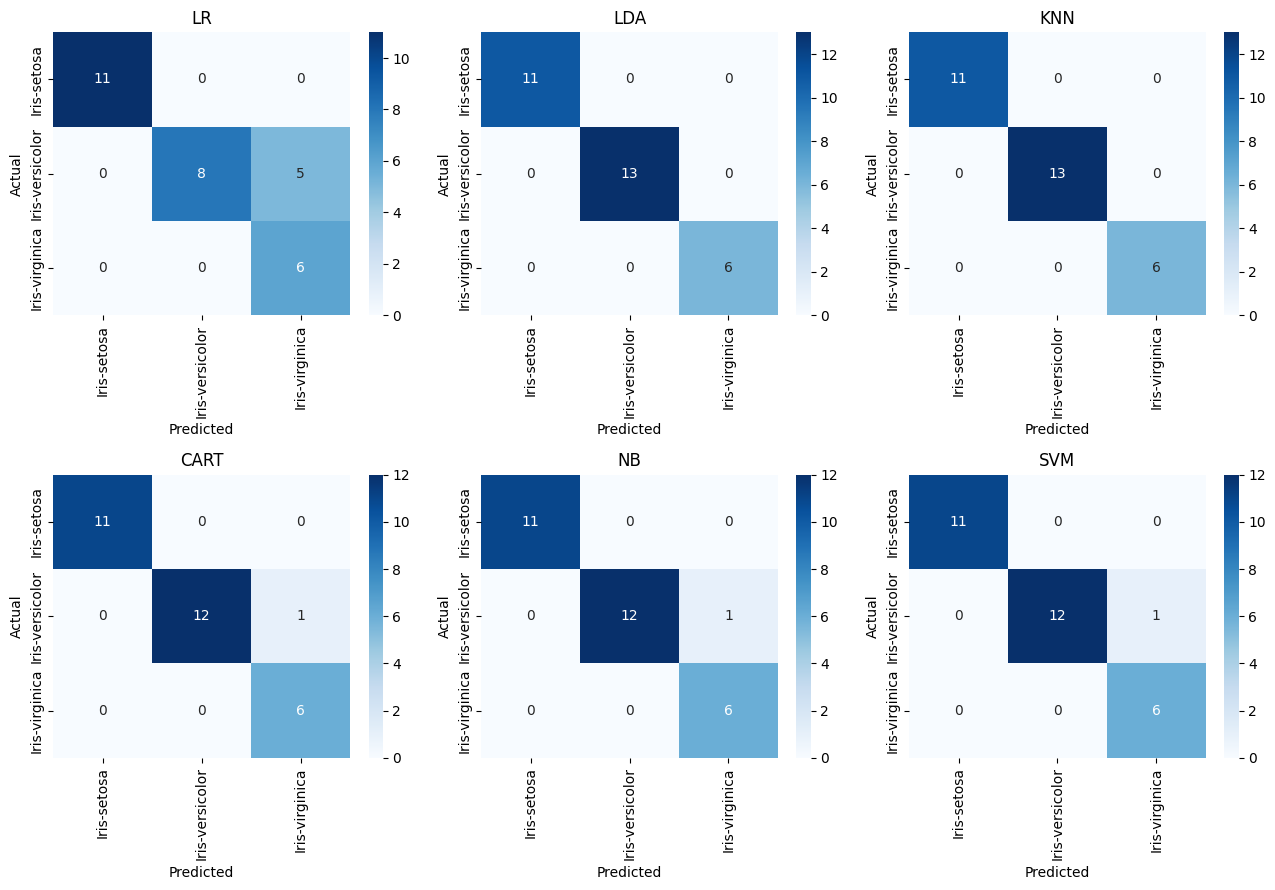

In [63]:
# Summarising confusion matrix for all methods
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Set up each confusion matrices
plt.figure(figsize=(13, 9))
for i, (name, model) in enumerate(models):
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)

    conf_matrix = confusion_matrix(Y_validation, predictions, labels=class_names)

    plt.subplot(2, 3, i + 1)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.title(name)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# Challenge 2

For the results using LR, LDA, KNN, CART, NB, and SVM, calculate accuracy, precision, recall and F1-score. Compare the results given by sklearn.

In [83]:
# Summarised results for manual calculation
manual_results = []

for name, model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_validation)
    y_true = Y_validation

    accuracy = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred, labels=class_names)

    scores = {}

    for i, cls in enumerate(class_names):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = cm.sum() - (TP + FP + FN)

        # Formulas for precision, recall, and f1
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        recall    = TP / (TP + FN) if (TP + FN) != 0 else 0
        f1        = 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0

        scores[f'{cls}_Precision'] = round(precision, 3)
        scores[f'{cls}_Recall'] = round(recall, 3)
        scores[f'{cls}_F1'] = round(f1, 3)

    # Macro average scores
    macro_precision = np.mean([scores[f'{cls}_Precision'] for cls in class_names])
    macro_recall = np.mean([scores[f'{cls}_Recall'] for cls in class_names])
    macro_f1 = np.mean([scores[f'{cls}_F1'] for cls in class_names])

    manual_results.append({
        'Model': name,
        'Accuracy': round(accuracy, 3),
        'Precision (Macro)': round(macro_precision, 3),
        'Recall (Macro)': round(macro_recall, 3),
        'F1-Score (Macro)': round(macro_f1, 3),
        **scores
    })

manual_df = pd.DataFrame(manual_results)
manual_df

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,Model,Accuracy,Precision (Macro),Recall (Macro),F1-Score (Macro),Iris-setosa_Precision,Iris-setosa_Recall,Iris-setosa_F1,Iris-versicolor_Precision,Iris-versicolor_Recall,Iris-versicolor_F1,Iris-virginica_Precision,Iris-virginica_Recall,Iris-virginica_F1
0,LR,0.833,0.848,0.872,0.823,1.0,1.0,1.0,1.0,0.615,0.762,0.545,1.0,0.706
1,LDA,1.000,1.000,1.000,1.000,1.0,1.0,1.0,1.0,1.000,1.000,1.000,1.0,1.000
2,KNN,1.000,1.000,1.000,1.000,1.0,1.0,1.0,1.0,1.000,1.000,1.000,1.0,1.000
3,CART,0.967,0.952,0.974,0.961,1.0,1.0,1.0,1.0,0.923,0.960,0.857,1.0,0.923
4,NB,0.967,0.952,0.974,0.961,1.0,1.0,1.0,1.0,0.923,0.960,0.857,1.0,0.923
5,SVM,0.967,0.952,0.974,0.961,1.0,1.0,1.0,1.0,0.923,0.960,0.857,1.0,0.923


In [82]:
# Show Comparison

# Rename columns to differentiate between manual and sklearn
manual_df_renamed = manual_df.copy()
results_df_renamed = results_df.copy()

manual_df_renamed = manual_df_renamed.add_suffix(' (Manual)')
results_df_renamed = results_df_renamed.add_suffix(' (Sklearn)')

comparison_df = pd.merge(
    manual_df_renamed,
    results_df_renamed,
    left_on='Model (Manual)',
    right_on='Model (Sklearn)'
).drop(columns=['Model (Sklearn)'])

# Reorder columns
metrics = [
    'Accuracy',
    'Precision (Macro)',
    'Recall (Macro)',
    'F1-Score (Macro)',
    'Iris-setosa_Precision', 'Iris-setosa_Recall', 'Iris-setosa_F1',
    'Iris-versicolor_Precision', 'Iris-versicolor_Recall', 'Iris-versicolor_F1',
    'Iris-virginica_Precision', 'Iris-virginica_Recall', 'Iris-virginica_F1'
]

ordered_cols = ['Model (Manual)']
for metric in metrics:
    ordered_cols.append(f'{metric} (Manual)')
    ordered_cols.append(f'{metric} (Sklearn)')

comparison_df = comparison_df[ordered_cols]

comparison_df.round(3)

,Model (Manual),Accuracy (Manual),Accuracy (Sklearn),Precision (Macro) (Manual),Precision (Macro) (Sklearn),Recall (Macro) (Manual),Recall (Macro) (Sklearn),F1-Score (Macro) (Manual),F1-Score (Macro) (Sklearn),Iris-setosa_Precision (Manual),Iris-setosa_Precision (Sklearn),Iris-setosa_Recall (Manual),Iris-setosa_Recall (Sklearn),Iris-setosa_F1 (Manual),Iris-setosa_F1 (Sklearn),Iris-versicolor_Precision (Manual),Iris-versicolor_Precision (Sklearn),Iris-versicolor_Recall (Manual),Iris-versicolor_Recall (Sklearn),Iris-versicolor_F1 (Manual),Iris-versicolor_F1 (Sklearn),Iris-virginica_Precision (Manual),Iris-virginica_Precision (Sklearn),Iris-virginica_Recall (Manual),Iris-virginica_Recall (Sklearn),Iris-virginica_F1 (Manual),Iris-virginica_F1 (Sklearn)
0,LR,0.833,0.833,0.848,0.848,0.872,0.872,0.823,0.823,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.615,0.615,0.762,0.762,0.545,0.545,1.0,1.0,0.706,0.706
1,LDA,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.0,1.0,1.000,1.000
2,KNN,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000,1.000,1.000,1.000,1.000,1.000,1.0,1.0,1.000,1.000
3,CART,0.967,0.967,0.952,0.952,0.974,0.974,0.961,0.961,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.923,0.923,0.960,0.960,0.857,0.857,1.0,1.0,0.923,0.923
4,NB,0.967,0.967,0.952,0.952,0.974,0.974,0.961,0.961,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.923,0.923,0.960,0.960,0.857,0.857,1.0,1.0,0.923,0.923
5,SVM,0.967,0.967,0.952,0.952,0.974,0.974,0.961,0.961,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.923,0.923,0.960,0.960,0.857,0.857,1.0,1.0,0.923,0.923
